In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sys.path.insert(0, "../src/")#
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *

In [2]:
np.random.seed(2020)

N = 500
xy = np.random.uniform(0, 1, (N, 2))
z = FrankeFunction(xy[:, 0], xy[:, 1]) #+  np.random.normal(0, 1, N) * 0.2
z = z.reshape(-1,1)
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.2)


curr_epochs = 0
per_loop = 10
tot_epochs = 1000

epochs = []
MSE = []

FFNN = FeedForwardNeuralNetwork(
    X=xy_train,
    Y=z_train,
    cost=CostFunctions.SquareError,
    activation=ActivationFunctions.ReLU,
    activation_out=ActivationFunctions.ID,
    network_shape=[30],
)

for i in range(int(tot_epochs / per_loop)):
    FFNN.train(N_minibatches=5, learning_rate=1, n_epochs=per_loop)
    z_test_prediction = FFNN.predict(xy_test)
    
    curr_epochs += per_loop
    epochs.append(curr_epochs)
    MSE.append(sum((z_test - z_test_prediction)**2) / (len(z_test)))


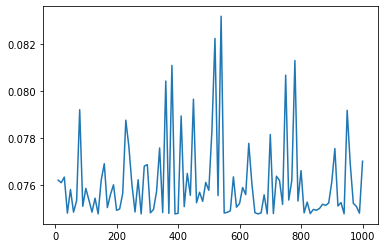

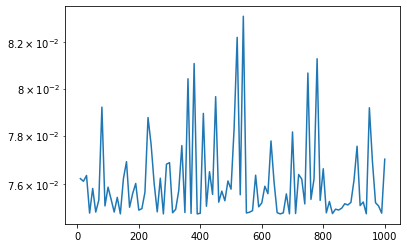

In [3]:
plt.plot(epochs, MSE)
plt.show()
plt.semilogy(epochs, MSE)
plt.show()

In [51]:
np.random.seed(2020)

N = 500
xy = np.random.uniform(0, 1, (N, 2))
z = FrankeFunction(xy[:, 0], xy[:, 1]) #+  np.random.normal(0, 1, N) * 0.2
z = z.reshape(-1,1)
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.2)


curr_epochs = 0
per_loop = 10
tot_epochs = 1000

epochs = []
MSE = []

FFNN = FeedForwardNeuralNetwork(
    X=xy_train,
    Y=z_train,
    cost=CostFunctions.SquareError,
    activation=ActivationFunctions.Sigmoid,
    activation_out=ActivationFunctions.ID,
    network_shape=[30],
)

FFNN.train(N_minibatches=5, learning_rate=0.1, n_epochs=tot_epochs)
z_test_prediction = FFNN.predict(xy_test)


In [52]:
FFNN.train(N_minibatches=10, learning_rate=0.1, n_epochs=tot_epochs*10)
z_test_prediction = FFNN.predict(xy_test)

In [53]:

resolution = 100
x = np.linspace(0, 1, resolution)
y = np.linspace(0, 1, resolution)
X, Y = np.meshgrid(x, y)

X_flat, Y_flat = X.flatten(), Y.flatten()
XY_flat = np.array([X_flat, Y_flat]).T
Z_pred = FFNN.predict(XY_flat)
Z_pred = Z_pred.T.reshape(X.shape)
Z_Franke = FrankeFunction(X, Y)

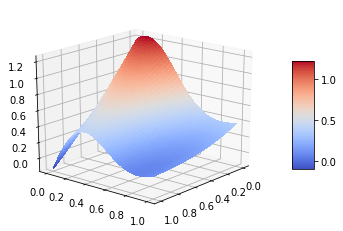

In [54]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=40)
fig.colorbar(surf, shrink=0.5, aspect=5)


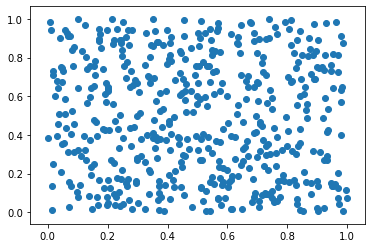

In [15]:
plt.scatter(xy[:,0],xy[:,1])